# Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import holidays

In [2]:
# Creates date_cet, date, month, day_of_week and time features
df_datetime = pd.date_range(start='01/01/2015 00:00:00', end='12/31/2019 23:00:00',freq='H', tz='Europe/Berlin').to_series()
date = df_datetime.dt.date
month = df_datetime.dt.month
day_of_week = df_datetime.dt.dayofweek
time = df_datetime.dt.hour
df_datetime = pd.DataFrame(df_datetime,columns = ['Date_cet']).reset_index().drop("index", axis=1)

In [3]:
def create_datetime(data,name):
    data=data.values.tolist()
    data=pd.DataFrame(data,columns = [name])
    return data

In [4]:
date = create_datetime(date,'Date')
month = create_datetime(month,'Month')
day_of_week = create_datetime(day_of_week,'Day_of_week')
time = create_datetime(time,'Time (hours)')

In [5]:
# Merges data
df_date = pd.concat([df_datetime,date['Date'],month['Month'],day_of_week['Day_of_week'],time['Time (hours)']],axis=1)
df_date['Date_cet'] = df_date['Date_cet'].apply(str)
df_date.head()

,Date_cet,Date,Month,Day_of_week,Time (hours)
0,2015-01-01 00:00:00+01:00,2015-01-01,1,3,0
1,2015-01-01 01:00:00+01:00,2015-01-01,1,3,1
2,2015-01-01 02:00:00+01:00,2015-01-01,1,3,2
3,2015-01-01 03:00:00+01:00,2015-01-01,1,3,3
4,2015-01-01 04:00:00+01:00,2015-01-01,1,3,4


In [6]:
# Creates publich holidays in Germany
def get_holidays(year):
    holidays_date = []
    for date in sorted(holidays.DE(years=year).items()):
        holidays_date.append(str(date[0]))
    return holidays_date

In [7]:
year = [2015,2016,2017,2018,2019]
list_holidays_2019 = get_holidays(2019)
holidays_list = get_holidays(year)
holidays_list = '|'.join(holidays_list)
df_date['Date'] = df_date['Date'].apply(str)
holidays = df_date['Date'].str.contains(holidays_list)
holidays *= 1 # True = 1, False = 0
holidays=holidays.rename("Public_holidays")
df_date = pd.concat([df_date,holidays],axis=1)
df_date.head()

,Date_cet,Date,Month,Day_of_week,Time (hours),Public_holidays
0,2015-01-01 00:00:00+01:00,2015-01-01,1,3,0,1
1,2015-01-01 01:00:00+01:00,2015-01-01,1,3,1,1
2,2015-01-01 02:00:00+01:00,2015-01-01,1,3,2,1
3,2015-01-01 03:00:00+01:00,2015-01-01,1,3,3,1
4,2015-01-01 04:00:00+01:00,2015-01-01,1,3,4,1


In [8]:
# Imports data
df = pd.read_csv('German_data.csv')
#df_date = pd.read_csv('Date_date1.csv')

# Merges data with date
df_data = pd.merge(df, df_date, left_on='Date_CET', right_on='Date_cet', how='left').drop("Date_cet", axis=1)

In [9]:
pd.set_option('display.max_columns', 100)

In [10]:
df_data.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays
0,2015-01-01 00:00:00+01:00,25.02,42097.00,42155.75,1007.0,15737.0,2771.0,10711.0,4905.00,1336.0,1162.0,4024.0,0.0,8129.0,517.0,132.0,0.0,7533.75,257.50,47777.75,2015-01-01,1,3,0,1
1,2015-01-01 01:00:00+01:00,18.29,40665.25,39969.50,499.0,15367.0,1918.0,11088.0,5034.25,851.0,1193.0,3982.0,0.0,8300.0,516.0,122.0,0.0,8021.00,259.00,46174.00,2015-01-01,1,3,1,1
2,2015-01-01 02:00:00+01:00,16.04,39510.00,38812.75,403.0,14855.0,1811.0,11027.0,5113.75,599.0,1143.0,4018.0,0.0,8544.0,514.0,93.0,0.0,8155.75,259.00,44767.25,2015-01-01,1,3,2,1
3,2015-01-01 03:00:00+01:00,14.60,38536.75,38489.75,404.0,14113.0,1945.0,11030.0,5085.25,119.0,1126.0,4040.0,0.0,8552.0,519.0,86.0,0.0,8244.50,259.00,42968.50,2015-01-01,1,3,3,1
4,2015-01-01 04:00:00+01:00,14.95,38153.00,38643.50,405.0,14149.0,1999.0,10964.0,5106.00,223.0,1118.0,4037.0,0.0,8646.0,522.0,84.0,0.0,8408.75,260.25,42871.00,2015-01-01,1,3,4,1


In [11]:
# Calculates total electricity generation and load/(the total)
def create_sum(data):
    new_column = data.copy()
    new_column['Gene_sum_forecast[MWh]'] = new_column[['Photovoltaics_forecast[MWh]', 'Wind_onshore_forecast[MWh]', 'Wind_offshore_forecast[MWh]', 
                                                  'Other_forecast[MWh]']].sum(axis=1)
    new_column['Rate_load/sum'] = new_column['Load_forecast[MWh]']/new_column['Gene_sum_forecast[MWh]']
    new_column['Rate_RE/sum'] = (new_column[['Photovoltaics_forecast[MWh]', 'Wind_onshore_forecast[MWh]', 
                                              'Wind_offshore_forecast[MWh]']].sum(axis=1))/new_column['Gene_sum_forecast[MWh]']
    return new_column

In [12]:
df_data = create_sum(df_data)
df_data.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays,Gene_sum_forecast[MWh],Rate_load/sum,Rate_RE/sum
0,2015-01-01 00:00:00+01:00,25.02,42097.00,42155.75,1007.0,15737.0,2771.0,10711.0,4905.00,1336.0,1162.0,4024.0,0.0,8129.0,517.0,132.0,0.0,7533.75,257.50,47777.75,2015-01-01,1,3,0,1,55569.0,0.758620,0.140209
1,2015-01-01 01:00:00+01:00,18.29,40665.25,39969.50,499.0,15367.0,1918.0,11088.0,5034.25,851.0,1193.0,3982.0,0.0,8300.0,516.0,122.0,0.0,8021.00,259.00,46174.00,2015-01-01,1,3,1,1,54454.0,0.734005,0.152055
2,2015-01-01 02:00:00+01:00,16.04,39510.00,38812.75,403.0,14855.0,1811.0,11027.0,5113.75,599.0,1143.0,4018.0,0.0,8544.0,514.0,93.0,0.0,8155.75,259.00,44767.25,2015-01-01,1,3,2,1,53182.0,0.729810,0.158226
3,2015-01-01 03:00:00+01:00,14.60,38536.75,38489.75,404.0,14113.0,1945.0,11030.0,5085.25,119.0,1126.0,4040.0,0.0,8552.0,519.0,86.0,0.0,8244.50,259.00,42968.50,2015-01-01,1,3,3,1,51472.0,0.747780,0.165206
4,2015-01-01 04:00:00+01:00,14.95,38153.00,38643.50,405.0,14149.0,1999.0,10964.0,5106.00,223.0,1118.0,4037.0,0.0,8646.0,522.0,84.0,0.0,8408.75,260.25,42871.00,2015-01-01,1,3,4,1,51540.0,0.749777,0.168199


In [13]:
# Extracts only data in 2019
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%Y-%m-%d')
d_19 = df_data[df_data['Date'] >= '2019/01/01']
d_19 = d_19.reset_index().drop("index", axis=1)
d_19['Date'] = d_19['Date'].dt.strftime('%Y-%m-%d')

In [14]:
d_19.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays,Gene_sum_forecast[MWh],Rate_load/sum,Rate_RE/sum
0,2019-01-01 00:00:00+01:00,28.32,42563.75,43213.50,2394.00,6319.25,2367.25,9001.50,2110.0,168.00,1558.50,4930.75,0.0,19995.50,3136.75,110.0,0.0,18879.75,5069.00,33105.25,2019-01-01,1,1,0,1,57054.0,0.757414,0.419756
1,2019-01-01 01:00:00+01:00,10.07,41400.00,41275.00,2089.25,5363.50,1990.00,8535.50,2033.5,116.25,1553.75,4904.50,0.0,22036.00,2868.00,110.0,0.0,20626.50,5042.25,31730.25,2019-01-01,1,1,1,1,57399.0,0.719089,0.447199
2,2019-01-01 02:00:00+01:00,-4.08,39888.75,40188.50,1848.00,5325.00,1755.00,7953.75,2008.0,87.75,1510.75,4866.50,0.0,22748.00,2459.25,110.0,0.0,22355.50,5028.50,29891.00,2019-01-01,1,1,2,1,57275.0,0.701676,0.478114
3,2019-01-01 03:00:00+01:00,-9.91,38650.25,39909.00,1813.25,5251.00,1880.75,7221.75,2029.5,1.00,1494.75,4865.75,0.0,23870.25,2697.75,110.0,0.0,24032.50,4977.75,29012.75,2019-01-01,1,1,3,1,58023.0,0.687813,0.499978
4,2019-01-01 04:00:00+01:00,-7.41,38793.75,40257.25,1858.25,5159.50,1830.25,7120.75,2052.0,1.00,1457.50,4867.00,0.0,25921.25,2578.25,110.0,0.0,25452.00,4907.25,28942.75,2019-01-01,1,1,4,1,59302.0,0.678851,0.511943


# Definition of negative

In [15]:
# Day-ahead is below zero 
negative_price_d_19 = d_19[d_19['Day-ahead[Euro/MWh]'] <= 0]

In [16]:
negative_price_d_19['Day-ahead[Euro/MWh]'].describe()

count    212.000000
mean     -17.192453
std       21.899807
min      -90.010000
25%      -22.980000
50%       -7.225000
75%       -2.467500
max        0.000000
Name: Day-ahead[Euro/MWh], dtype: float64

In [19]:
list_holidays_2019

['2019-01-01',
 '2019-04-19',
 '2019-04-22',
 '2019-05-01',
 '2019-05-30',
 '2019-06-10',
 '2019-10-03',
 '2019-12-25',
 '2019-12-26']

In [20]:
def create_graph(target,figsize_h,figsize_v,ax_horizontal,ax2_horizontal,bins):
    fig = plt.figure(figsize=(figsize_h,figsize_v))
    ax = fig.add_subplot(1,1,1)
    x = np.linspace(0,23,1)
    ax.plot(negative_price_d_19.groupby(target)['Day-ahead[Euro/MWh]'].mean(),label='mean',linewidth = 3.0,color='blue')
    ax.plot(negative_price_d_19.groupby(target)['Day-ahead[Euro/MWh]'].min(),label='min',linewidth = 3.0,color='green')
    ax.legend(bbox_to_anchor=(ax_horizontal, 0.5), loc='center right')
    ax.set_xlabel(target)
    plt.xticks(rotation=90)
    ax.set_ylabel('Day-ahead[Euro/MWh]')
    ax.grid(True)

    ax2 = ax.twinx()
    ax2.hist(x=negative_price_d_19[target],color="red",alpha=0.3, bins=bins,label='Occurrence')
    ax2.legend(bbox_to_anchor=(ax2_horizontal, 0.5),loc='center left')
    ax2.set_ylabel('Occurrence')

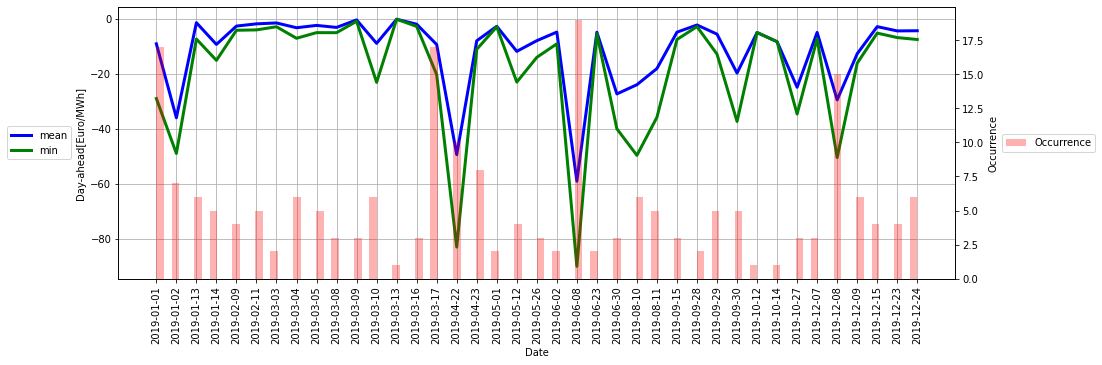

In [21]:
create_graph('Date',15,5,-0.05,1.05,100)

0     13
1     17
2     21
3     19
4     16
5      9
6     10
7      6
8      5
9      4
10     7
11     5
12     8
13    15
14    20
15    14
16     7
17     3
18     2
19     1
20     2
21     2
22     1
23     5
Name: Time (hours), dtype: int64

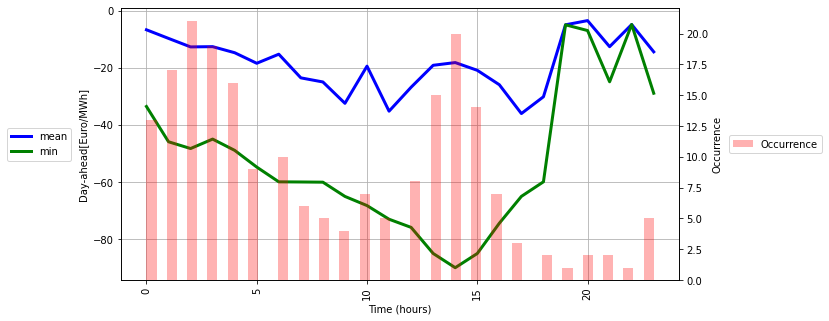

In [22]:
create_graph('Time (hours)',10,5,-0.08,1.08,50)
negative_price_d_19['Time (hours)'].value_counts(sort=False)

0    42
1    36
2    10
4     3
5    41
6    80
Name: Day_of_week, dtype: int64

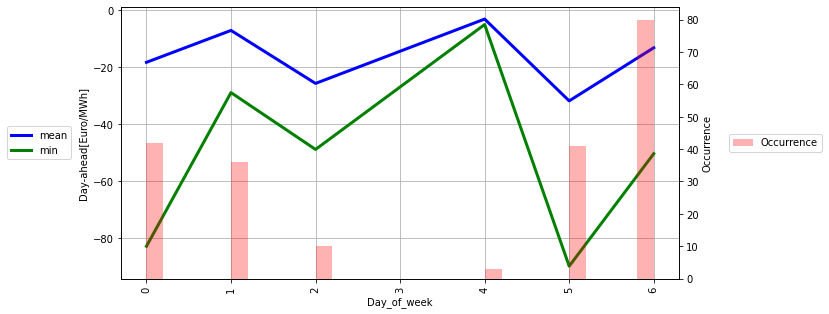

In [23]:
create_graph('Day_of_week',10,5,-0.08,1.08,30)
negative_price_d_19['Day_of_week'].value_counts(sort=False)

1     35
2      9
3     46
4     18
5      9
6     26
8     11
9     15
10     5
12    38
Name: Month, dtype: int64

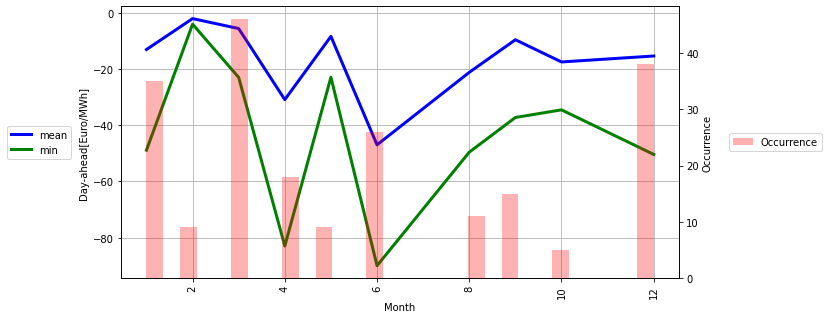

In [24]:
create_graph('Month',10,5,-0.08,1.08,30)
negative_price_d_19['Month'].value_counts(sort=False)

# Graphical analysis

## Negative price

In [25]:
# Shows frequency of the negative price
print('Date        Frequency')
print(negative_price_d_19['Date'].value_counts().head(20))

Date        Frequency
2019-06-08    19
2019-03-17    17
2019-01-01    17
2019-12-08    15
2019-04-22    10
2019-04-23     8
2019-01-02     7
2019-01-13     6
2019-03-10     6
2019-12-09     6
2019-03-04     6
2019-12-24     6
2019-08-10     6
2019-09-30     5
2019-03-05     5
2019-01-14     5
2019-09-29     5
2019-02-11     5
2019-08-11     5
2019-02-09     4
Name: Date, dtype: int64


In [26]:
# Creates data that the price became negative over 5 times per day
time_2019_0608 = d_19[(d_19['Date'] == '2019-06-08')]
time_2019_0317 = d_19[(d_19['Date'] == '2019-03-17')]
time_2019_0101 = d_19[(d_19['Date'] == '2019-01-01')]
time_2019_1208 = d_19[(d_19['Date'] == '2019-12-08')]
time_2019_0422 = d_19[(d_19['Date'] == '2019-04-22')]
time_2019_0423 = d_19[(d_19['Date'] == '2019-04-23')]
time_2019_0102 = d_19[(d_19['Date'] == '2019-01-02')]
time_2019_0304 = d_19[(d_19['Date'] == '2019-03-04')]
time_2019_0310 = d_19[(d_19['Date'] == '2019-03-10')]
time_2019_0810 = d_19[(d_19['Date'] == '2019-08-10')]
time_2019_0113 = d_19[(d_19['Date'] == '2019-01-13')]
time_2019_1209 = d_19[(d_19['Date'] == '2019-12-09')]
time_2019_1224 = d_19[(d_19['Date'] == '2019-12-24')]
time_2019_0114 = d_19[(d_19['Date'] == '2019-01-14')]
time_2019_0211 = d_19[(d_19['Date'] == '2019-02-11')]
time_2019_0930 = d_19[(d_19['Date'] == '2019-09-30')]
time_2019_0811 = d_19[(d_19['Date'] == '2019-08-11')]
time_2019_0929 = d_19[(d_19['Date'] == '2019-09-29')]
time_2019_0305 = d_19[(d_19['Date'] == '2019-03-05')]

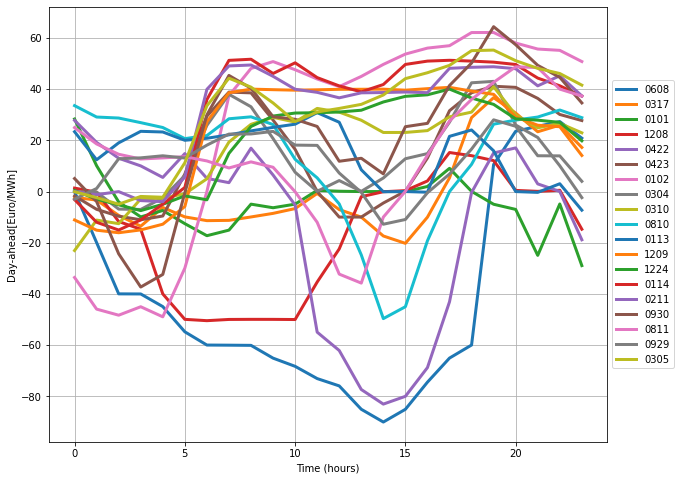

In [27]:
# over 5 times
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
x = np.linspace(0,23,1)
ax.plot(time_2019_0608['Time (hours)'],time_2019_0608['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0608')
ax.plot(time_2019_0317['Time (hours)'],time_2019_0317['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0317')
ax.plot(time_2019_0101['Time (hours)'],time_2019_0101['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0101')
ax.plot(time_2019_1208['Time (hours)'],time_2019_1208['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='1208')
ax.plot(time_2019_0422['Time (hours)'],time_2019_0422['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0422')
ax.plot(time_2019_0423['Time (hours)'],time_2019_0423['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0423')
ax.plot(time_2019_0102['Time (hours)'],time_2019_0102['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0102')
ax.plot(time_2019_0304['Time (hours)'],time_2019_0304['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0304')
ax.plot(time_2019_0310['Time (hours)'],time_2019_0310['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0310')
ax.plot(time_2019_0810['Time (hours)'],time_2019_0810['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0810')
ax.plot(time_2019_0113['Time (hours)'],time_2019_0113['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0113')
ax.plot(time_2019_1209['Time (hours)'],time_2019_1209['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='1209')
ax.plot(time_2019_1224['Time (hours)'],time_2019_1224['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='1224')
ax.plot(time_2019_0114['Time (hours)'],time_2019_0114['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0114')
ax.plot(time_2019_0211['Time (hours)'],time_2019_0211['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0211')
ax.plot(time_2019_0930['Time (hours)'],time_2019_0930['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0930')
ax.plot(time_2019_0811['Time (hours)'],time_2019_0811['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0811')
ax.plot(time_2019_0929['Time (hours)'],time_2019_0929['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0929')
ax.plot(time_2019_0305['Time (hours)'],time_2019_0305['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0305')


ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Day-ahead[Euro/MWh]')
ax.grid(True)

Each line represents a date (e.g. 0607 means 7th June). There was a similar trend between 10h and 20h. The price trend decreased at around 10, reached at the lowest price at around 15, and it increased.

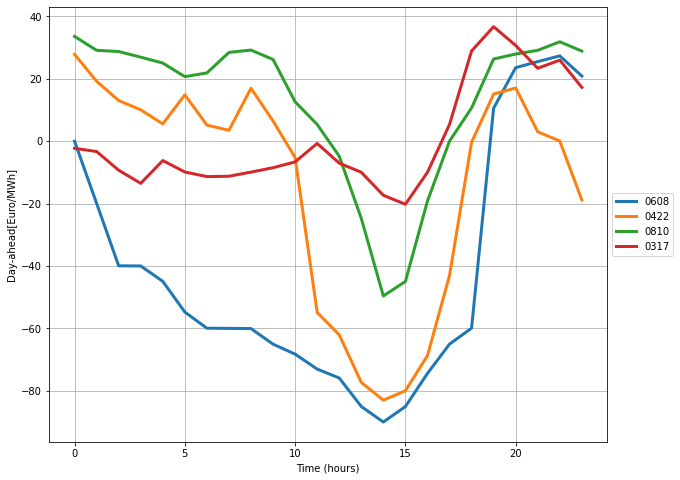

In [28]:
# similer trend
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
x = np.linspace(0,23,1)
ax.plot(time_2019_0608['Time (hours)'],time_2019_0608['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0608')
ax.plot(time_2019_0422['Time (hours)'],time_2019_0422['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0422')
ax.plot(time_2019_0810['Time (hours)'],time_2019_0810['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0810')
ax.plot(time_2019_0317['Time (hours)'],time_2019_0317['Day-ahead[Euro/MWh]'], linestyle='solid', linewidth = 3.0, label='0317')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Day-ahead[Euro/MWh]')
ax.grid(True)

These four lines are very similar behavior. There might be specific reasons. Next graphs show forecast data with time series to find reasons why negative price happend.

In [29]:
# Creates comparision graphs
def comparision_data1(target,figsize_h,figsize_v,
                      data1,name1,data2,name2,data3,name3,
                      data4,name4,data5,name5,data6,name6,
                      data7,name7,data8,name8,data9,name9,data10,name10, 
                      data11,name11,data12,name12,data13,name13):
    
    plt.subplots_adjust(wspace=0.4, hspace=0.3)
    fig = plt.figure(figsize=(figsize_h,figsize_v))
    ax = fig.add_subplot(1,4,1)
    x = np.linspace(0,23,1)
    ax.axvspan(0, 18, color="black", alpha=0.1)
    ax.axvline(x=14, linestyle='dashed')
    ax.plot(data1['Time (hours)'],data1[target], color='green',  linestyle='solid', linewidth = 3.0, label=name1)
    ax.plot(data2['Time (hours)'],data2[target], color='red',  linestyle='solid', linewidth = 3.0, label=name2)
    ax.plot(data3['Time (hours)'],data3[target], color='blue',  linestyle='solid', linewidth = 3.0, label=name3)
    ax.legend()
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel(target)
    ax.grid(True)
    
    ax2 = fig.add_subplot(1,4,2)
    ax2.axvspan(10, 18, color="black", alpha=0.1)
    ax2.axvline(x=14, linestyle='dashed')
    ax2.plot(data4['Time (hours)'],data4[target], color='green',  linestyle='solid', linewidth = 3.0, label=name4)
    ax2.plot(data5['Time (hours)'],data5[target], color='red',  linestyle='solid', linewidth = 3.0, label=name5)
    ax2.plot(data6['Time (hours)'],data6[target], color='blue',  linestyle='solid', linewidth = 3.0, label=name6)
    ax2.legend()
    ax2.set_xlabel('Time (hours)')
    ax2.set_ylabel(target)
    ax2.grid(True)
    
    ax3 = fig.add_subplot(1,4,3)
    ax3.axvline(x=14, linestyle='dashed')
    ax3.axvspan(12, 17, color="black", alpha=0.1)
    ax3.plot(data7['Time (hours)'],data7[target], color='green',  linestyle='solid', linewidth = 3.0, label=name7)
    ax3.plot(data8['Time (hours)'],data8[target], color='red',  linestyle='solid', linewidth = 3.0, label=name8)
    ax3.plot(data9['Time (hours)'],data9[target], color='orange',  linestyle='solid', linewidth = 3.0, label=name9)
    ax3.plot(data10['Time (hours)'],data10[target], color='blue',  linestyle='solid', linewidth = 3.0, label=name10)
    ax3.legend()
    ax3.set_xlabel('Time (hours)')
    ax3.set_ylabel(target)
    ax3.grid(True)
    
    ax4 = fig.add_subplot(1,4,4)
    ax4.axvline(x=15, linestyle='dashed')
    ax4.axvspan(0, 16, color="black", alpha=0.1)
    ax4.plot(data7['Time (hours)'],data11[target], color='green',  linestyle='solid', linewidth = 3.0, label=name11)
    ax4.plot(data8['Time (hours)'],data12[target], color='red',  linestyle='solid', linewidth = 3.0, label=name12)
    ax4.plot(data9['Time (hours)'],data13[target], color='orange',  linestyle='solid', linewidth = 3.0, label=name13)
    ax4.legend()
    ax4.set_xlabel('Time (hours)')
    ax4.set_ylabel(target)
    ax4.grid(True)
    fig.show()

In [30]:
# Defines the worst date with the previous and next days
time_2019_0607 = d_19[(d_19['Date'] == '2019-06-07')]
time_2019_0608 = d_19[(d_19['Date'] == '2019-06-08')]
time_2019_0609 = d_19[(d_19['Date'] == '2019-06-09')]

time_2019_0421 = d_19[(d_19['Date'] == '2019-04-21')]
time_2019_0422 = d_19[(d_19['Date'] == '2019-04-22')]
time_2019_0423 = d_19[(d_19['Date'] == '2019-04-23')]

time_2019_0808 = d_19[(d_19['Date'] == '2019-08-08')]
time_2019_0810 = d_19[(d_19['Date'] == '2019-08-10')]
time_2019_0811 = d_19[(d_19['Date'] == '2019-08-11')]
time_2019_0812 = d_19[(d_19['Date'] == '2019-08-12')]

time_2019_0316 = d_19[(d_19['Date'] == '2019-03-16')]
time_2019_0317 = d_19[(d_19['Date'] == '2019-03-17')]
time_2019_0318 = d_19[(d_19['Date'] == '2019-03-18')]

In [31]:
forecast_list = list(['Day-ahead[Euro/MWh]', 'Rate_RE/sum', 'Rate_load/sum','Gene_sum_forecast[MWh]','Load_forecast[MWh]',
                      'Photovoltaics_forecast[MWh]','Wind_onshore_forecast[MWh]', 'Wind_offshore_forecast[MWh]', 'Other_forecast[MWh]'])

<Figure size 432x288 with 0 Axes>

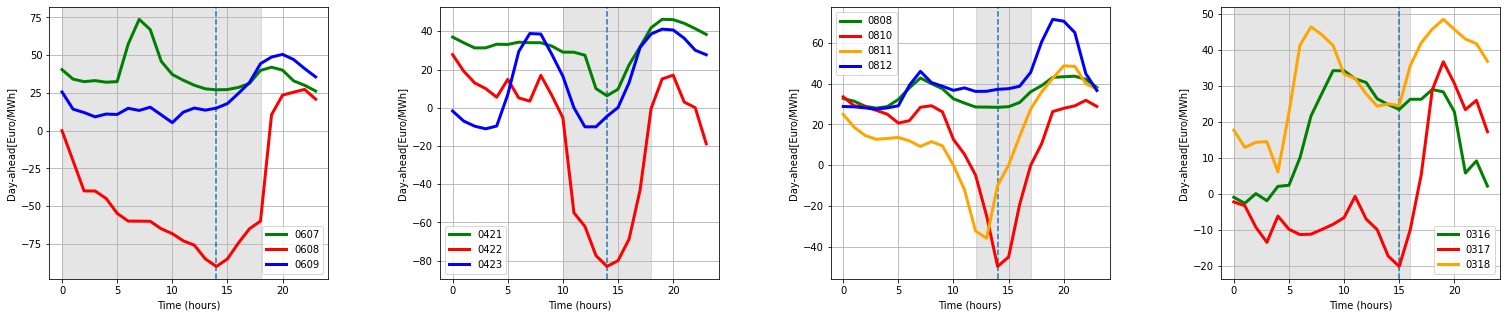

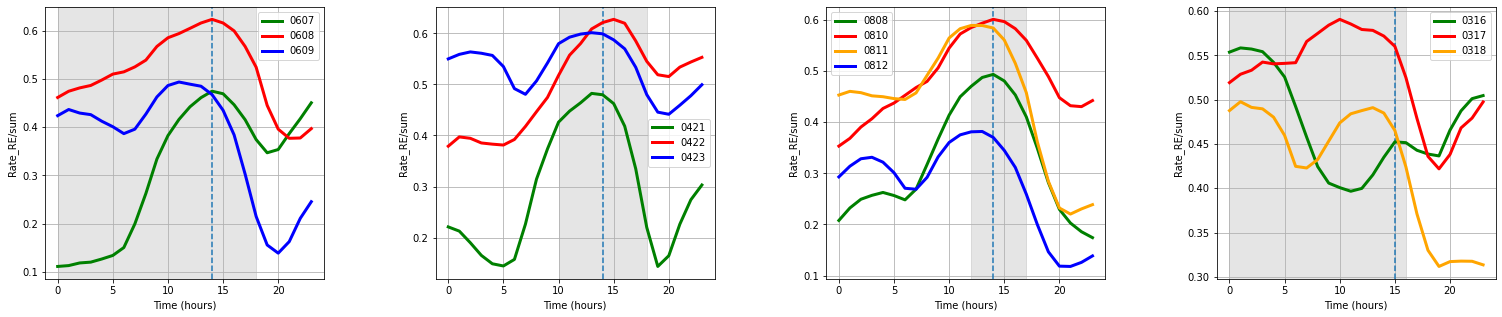

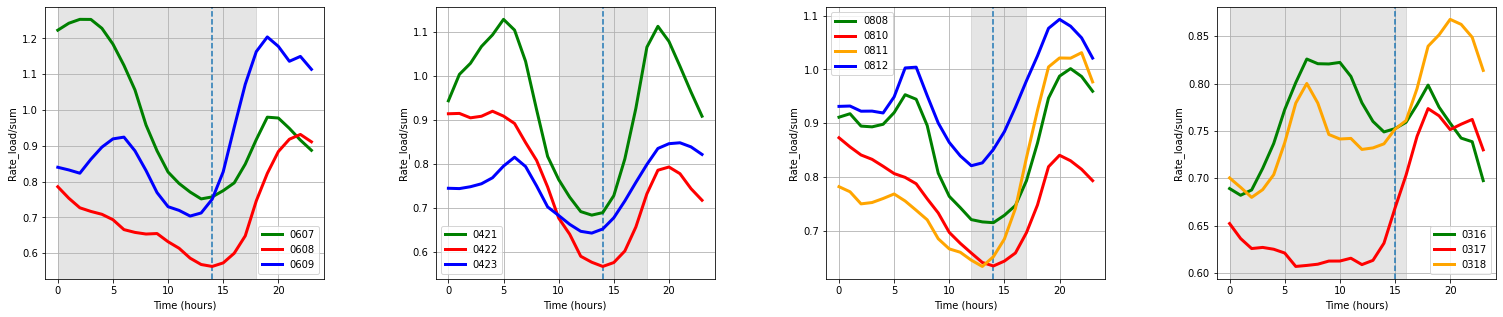

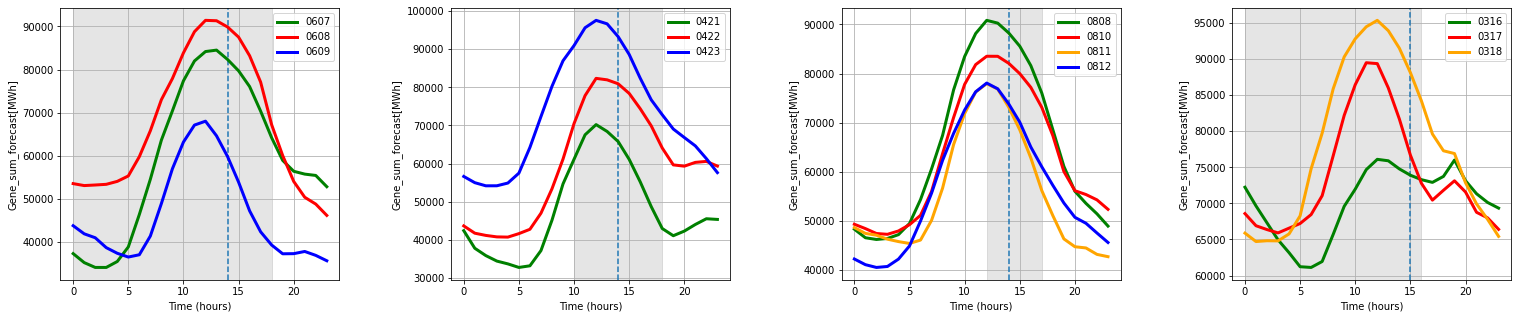

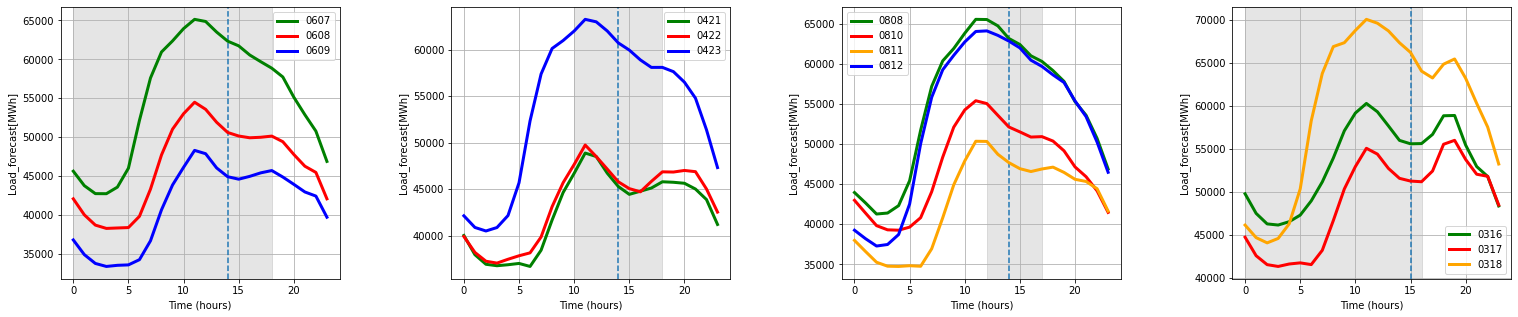

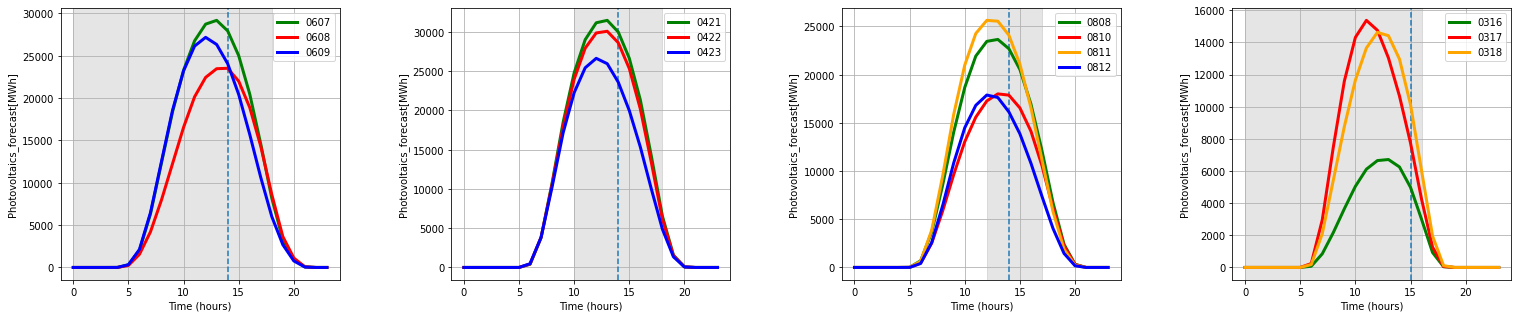

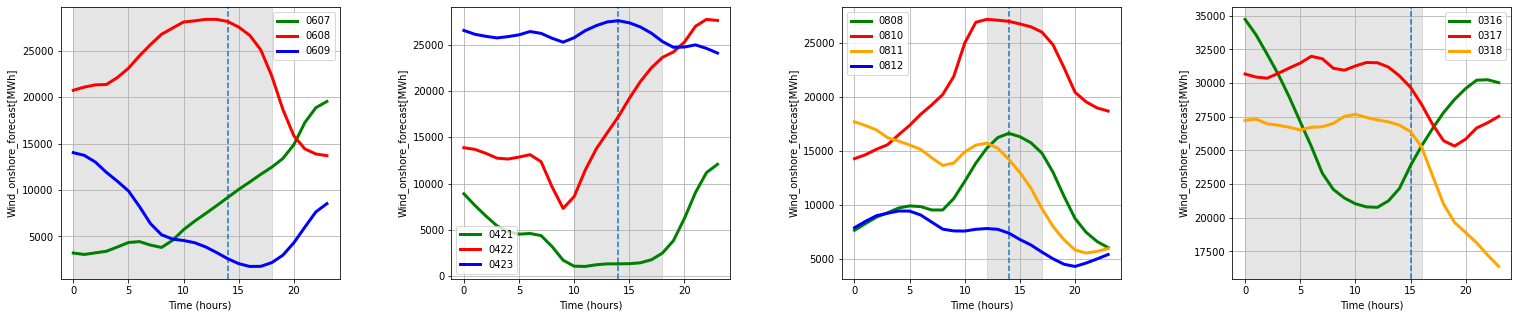

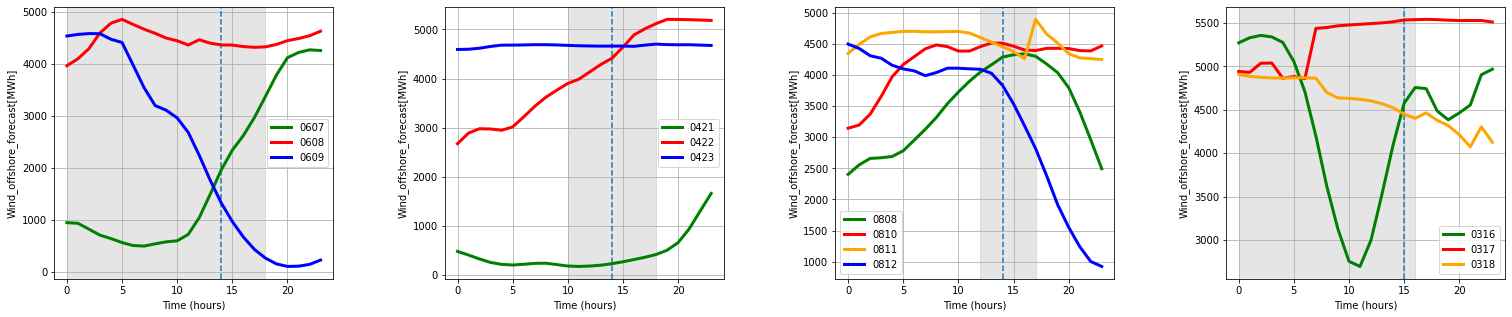

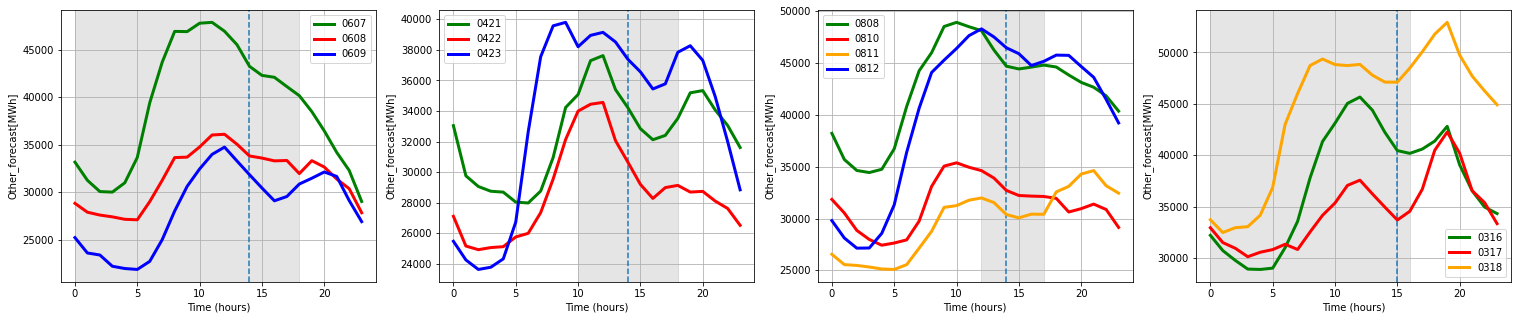

In [32]:
for i in forecast_list:
    comparision_data1(i,26,5, time_2019_0607, '0607', time_2019_0608, '0608', time_2019_0609, '0609',
                      time_2019_0421, '0421', time_2019_0422, '0422', time_2019_0423, '0423',
                      time_2019_0808, '0808', time_2019_0810, '0810', time_2019_0811, '0811', time_2019_0812, '0812',
                      time_2019_0316, '0316', time_2019_0317, '0317', time_2019_0318, '0318')

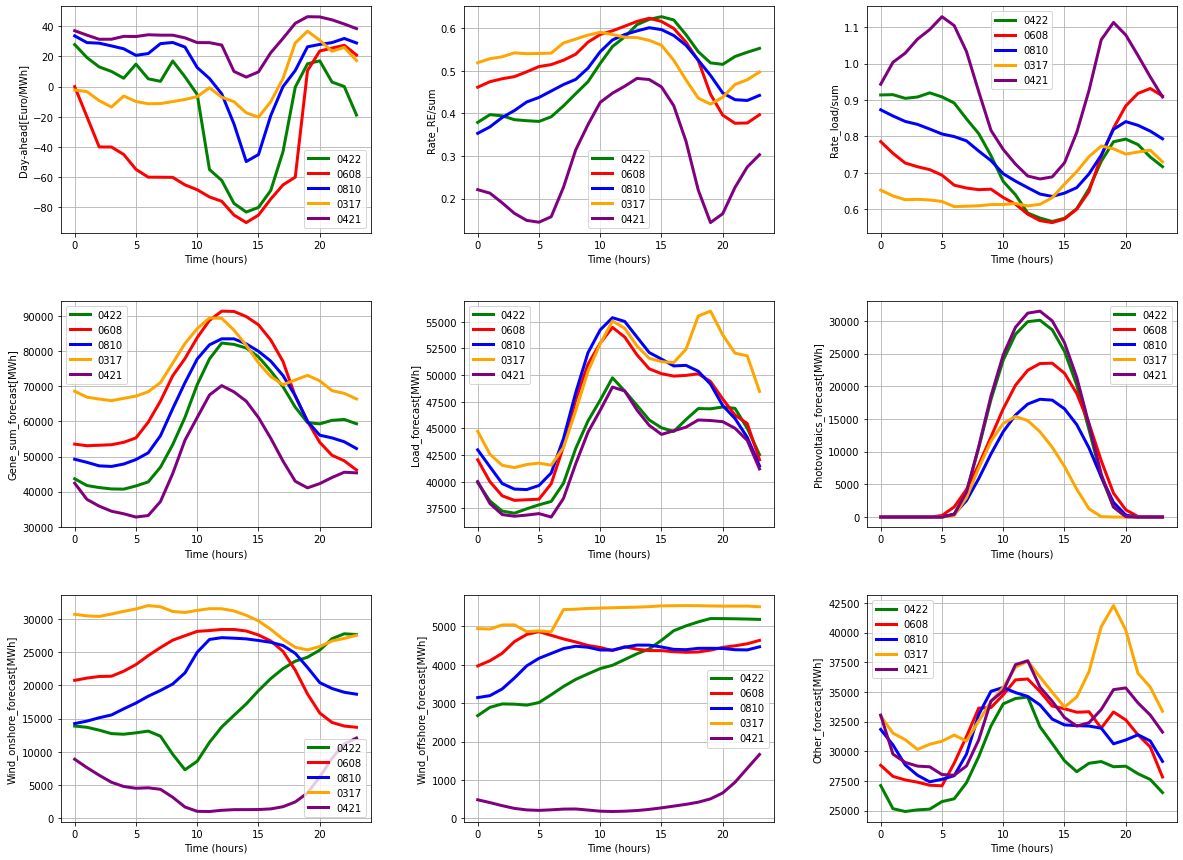

In [33]:
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for idx,i in enumerate(forecast_list):
    ax = fig.add_subplot(3, 3,idx+1)
    ax.plot(time_2019_0422['Time (hours)'],time_2019_0422[i], color='green',  linestyle='solid', linewidth = 3.0, label='0422')
    ax.plot(time_2019_0608['Time (hours)'],time_2019_0608[i], color='red',  linestyle='solid', linewidth = 3.0, label='0608')
    ax.plot(time_2019_0810['Time (hours)'],time_2019_0810[i], color='blue',  linestyle='solid', linewidth = 3.0, label='0810')
    ax.plot(time_2019_0317['Time (hours)'],time_2019_0317[i], color='orange',  linestyle='solid', linewidth = 3.0, label='0317')
    ax.plot(time_2019_0421['Time (hours)'],time_2019_0421[i], color='purple',  linestyle='solid', linewidth = 3.0, label='0421')
    ax.legend()
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel(i)
    ax.grid(True)
    fig.show()
    fig.show()

# Events on specific date  

## Negative price
- German team had a match at UEFA European Football Championship and FIFA Women's World Cup on 8th June.
- 11 matches in Germany on 22nd April.
- 2 matched in Germany on 23rd April.
- 32 matched in Germany on 10th August.
- 17 matched in Germany on 11th August.

Data on 23rd Apr had similar trends as other worse dates, but football matches were less than other dates. Therefore, day-ahead on 23rd Apr did not decrease significantly. 

In [34]:
df_football = pd.read_csv('No_football_match.csv')

In [35]:
df_football.head()

,Football_count,date
0,4,2019-02-01
1,17,2019-03-01
2,3,2019-04-01
3,30,2019-05-01
4,2,2019-06-01


In [36]:
# Merges data in 2019 and football matches data
new_df = pd.merge(d_19, df_football, left_on='Date', right_on='date', how='left').drop("date", axis=1)

In [37]:
new_df.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays,Gene_sum_forecast[MWh],Rate_load/sum,Rate_RE/sum,Football_count
0,2019-01-01 00:00:00+01:00,28.32,42563.75,43213.50,2394.00,6319.25,2367.25,9001.50,2110.0,168.00,1558.50,4930.75,0.0,19995.50,3136.75,110.0,0.0,18879.75,5069.00,33105.25,2019-01-01,1,1,0,1,57054.0,0.757414,0.419756,NaN
1,2019-01-01 01:00:00+01:00,10.07,41400.00,41275.00,2089.25,5363.50,1990.00,8535.50,2033.5,116.25,1553.75,4904.50,0.0,22036.00,2868.00,110.0,0.0,20626.50,5042.25,31730.25,2019-01-01,1,1,1,1,57399.0,0.719089,0.447199,NaN
2,2019-01-01 02:00:00+01:00,-4.08,39888.75,40188.50,1848.00,5325.00,1755.00,7953.75,2008.0,87.75,1510.75,4866.50,0.0,22748.00,2459.25,110.0,0.0,22355.50,5028.50,29891.00,2019-01-01,1,1,2,1,57275.0,0.701676,0.478114,NaN
3,2019-01-01 03:00:00+01:00,-9.91,38650.25,39909.00,1813.25,5251.00,1880.75,7221.75,2029.5,1.00,1494.75,4865.75,0.0,23870.25,2697.75,110.0,0.0,24032.50,4977.75,29012.75,2019-01-01,1,1,3,1,58023.0,0.687813,0.499978,NaN
4,2019-01-01 04:00:00+01:00,-7.41,38793.75,40257.25,1858.25,5159.50,1830.25,7120.75,2052.0,1.00,1457.50,4867.00,0.0,25921.25,2578.25,110.0,0.0,25452.00,4907.25,28942.75,2019-01-01,1,1,4,1,59302.0,0.678851,0.511943,NaN


In [38]:
# Extracts number of negative day-ahead at each day
a = negative_price_d_19['Date'].value_counts()
a = pd.DataFrame(data=a)
a['date'] = a.index
a = a.reset_index().drop("index", axis=1)
a = a.rename(columns = {"Date": "No_negative"})
a.head()

,No_negative,date
0,19,2019-06-08
1,17,2019-03-17
2,17,2019-01-01
3,15,2019-12-08
4,10,2019-04-22


In [39]:
# # Merges new_df and number of negative dayahead value data
b = pd.merge(new_df,a, left_on='Date', right_on='date', how='left') .drop("date", axis=1)
b.head()

,Date_CET,Day-ahead[Euro/MWh],Load_actual[MWh],Load_forecast[MWh],Fossil_gas_actual[MWh],Fossil_brown_coal_actual[MWh],Fossil_hard_coal_actual[MWh],Nuclear_actual[MWh],Other_conventional_actual[MWh],Hydro_pumped_storage_actual[MWh],Hydropower_actual[MWh],Biomass_actual[MWh],Photovoltaics_actual[MWh],Wind_onshore_actual[MWh],Wind_offshore_actual[MWh],Other_renewable_actual[MWh],Photovoltaics_forecast[MWh],Wind_onshore_forecast[MWh],Wind_offshore_forecast[MWh],Other_forecast[MWh],Date,Month,Day_of_week,Time (hours),Public_holidays,Gene_sum_forecast[MWh],Rate_load/sum,Rate_RE/sum,Football_count,No_negative
0,2019-01-01 00:00:00+01:00,28.32,42563.75,43213.50,2394.00,6319.25,2367.25,9001.50,2110.0,168.00,1558.50,4930.75,0.0,19995.50,3136.75,110.0,0.0,18879.75,5069.00,33105.25,2019-01-01,1,1,0,1,57054.0,0.757414,0.419756,NaN,17.0
1,2019-01-01 01:00:00+01:00,10.07,41400.00,41275.00,2089.25,5363.50,1990.00,8535.50,2033.5,116.25,1553.75,4904.50,0.0,22036.00,2868.00,110.0,0.0,20626.50,5042.25,31730.25,2019-01-01,1,1,1,1,57399.0,0.719089,0.447199,NaN,17.0
2,2019-01-01 02:00:00+01:00,-4.08,39888.75,40188.50,1848.00,5325.00,1755.00,7953.75,2008.0,87.75,1510.75,4866.50,0.0,22748.00,2459.25,110.0,0.0,22355.50,5028.50,29891.00,2019-01-01,1,1,2,1,57275.0,0.701676,0.478114,NaN,17.0
3,2019-01-01 03:00:00+01:00,-9.91,38650.25,39909.00,1813.25,5251.00,1880.75,7221.75,2029.5,1.00,1494.75,4865.75,0.0,23870.25,2697.75,110.0,0.0,24032.50,4977.75,29012.75,2019-01-01,1,1,3,1,58023.0,0.687813,0.499978,NaN,17.0
4,2019-01-01 04:00:00+01:00,-7.41,38793.75,40257.25,1858.25,5159.50,1830.25,7120.75,2052.0,1.00,1457.50,4867.00,0.0,25921.25,2578.25,110.0,0.0,25452.00,4907.25,28942.75,2019-01-01,1,1,4,1,59302.0,0.678851,0.511943,NaN,17.0


In [40]:
# The data shows hourly value. That is why using mean to convert to daily
final = b.groupby("Date")[['No_negative','Football_count']].mean()

In [41]:
# Shows number of negative day-ahead is greater than 5 times 
final[final['No_negative'] >=5].sort_values('No_negative', ascending=False)

,No_negative,Football_count
Date,,
2019-06-08,19.0,9.0
2019-01-01,17.0,NaN
2019-03-17,17.0,74.0
2019-12-08,15.0,62.0
2019-04-22,10.0,46.0
2019-04-23,8.0,2.0
2019-01-02,7.0,NaN
2019-03-04,6.0,3.0
2019-03-10,6.0,57.0
